In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.applications import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                               height_shift_range=0.2,validation_split=0.2)

batch_size = 7

train_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

validation_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='validation')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.


In [4]:
test_datagen =ImageDataGenerator(rescale=1./255)
test_genrator=test_datagen.flow_from_directory('drowsiness data/test',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

Found 3129 images belonging to 2 classes.


In [5]:
validation_genrator.class_indices

{'Closed': 0, 'Opened': 1}

In [6]:
conv_base = VGG16(
weights='imagenet',
include_top = False,
input_shape=(80,80,3)
)

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 80, 80, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 80, 80, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0     

In [8]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [10]:
conv_base.trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [11]:
for layer in conv_base.layers:
    layer.trainable = False
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [12]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=False)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_genrator,epochs=20,validation_data=validation_genrator,callbacks=earlystopping)

Epoch 1/20
2349/2349 [==============================] - 1077s 458ms/step - loss: 0.5074 - accuracy: 0.7360 - val_loss: 0.3861 - val_accuracy: 0.8177
Epoch 2/20
2349/2349 [==============================] - 1069s 455ms/step - loss: 0.3996 - accuracy: 0.8174 - val_loss: 0.4068 - val_accuracy: 0.8017
Epoch 3/20
2349/2349 [==============================] - 1072s 457ms/step - loss: 0.3749 - accuracy: 0.8341 - val_loss: 0.4080 - val_accuracy: 0.8167
Epoch 4/20
2349/2349 [==============================] - 1074s 457ms/step - loss: 0.3467 - accuracy: 0.8520 - val_loss: 0.4392 - val_accuracy: 0.7790
Epoch 5/20
2349/2349 [==============================] - 778s 331ms/step - loss: 0.3434 - accuracy: 0.8542 - val_loss: 0.4252 - val_accuracy: 0.8284
Epoch 6/20
2349/2349 [==============================] - 667s 284ms/step - loss: 0.3338 - accuracy: 0.8599 - val_loss: 0.4488 - val_accuracy: 0.8245
Epoch 7/20
2349/2349 [==============================] - 648s 276ms/step - loss: 0.3233 - accuracy: 0.8627 - 

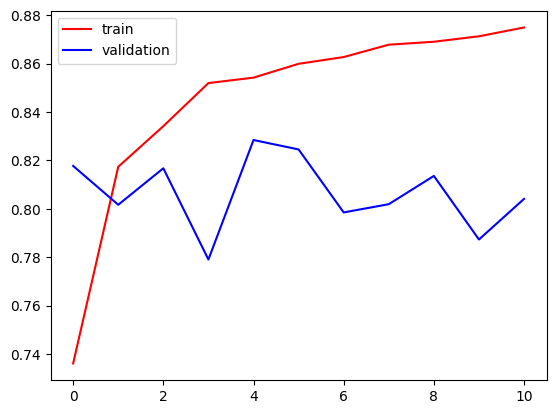

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

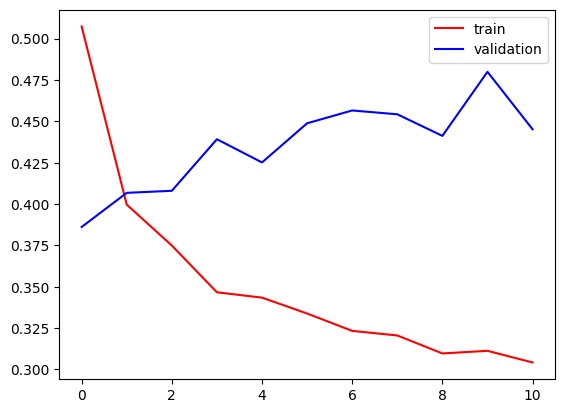

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
pred=model.predict(test_genrator)
opn=[]
closen= []
for p in pred:
    if p[0]>=0.5:
        opn.append(1)
    else:
        closen.append(0)
        
print(len(opn))
print(len(closen))

447/447 [==============================] - 103s 220ms/step
1079
2050


In [20]:
model.save('vgg16.h5')

In [17]:
for layer in conv_base.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
